In [88]:
# Import our dependencies
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, LeakyReLU, PReLU, ELU
from tensorflow.keras.activations import swish
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax


import pandas as pd
heart_attack_df = pd.read_csv('heart_attack_analysis.csv')

In [89]:
heart_attack_df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [90]:
column_rename_dict = {
    'age': 'Age','sex': 'Sex','cp': 'Chest_Pain_Type','trestbps': 'Resting_Blood_Pressure',
    'chol': 'Serum_Cholesterol','fbs': 'Fasting_Blood_Sugar','restecg': 'Rest_ECG',
    'thalach': 'Max_Heart_Rate_Achieved','exang': 'Exercise_Induced_Angina','oldpeak': 'ST_Depression',
    'slope': 'ST_Slope','ca': 'Num_Major_Vessels','thal': 'Thalassemia','num': 'Heart_Disease_Diagnosis'
}

# Apply the renaming
renamed_df = heart_attack_df.rename(columns=column_rename_dict)

renamed_df.head(3)

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Rest_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,ST_Slope,Num_Major_Vessels,Thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [91]:
renamed_df = renamed_df.drop(columns=['Fasting_Blood_Sugar', 'Rest_ECG', 'Age', 'Sex'])
#We drop Fasting_Blood_Sugar and Rest_ECG as they are binary values that do not provide anything additional to the prediction,
#It would be more useful if the Fasting_Blood_Sugar showed the level of sugar, and same situation with Rest_ECG

In [92]:
df_encoded = pd.get_dummies(renamed_df, columns=['Chest_Pain_Type', 'ST_Slope', 'Thalassemia'], drop_first=False)
df_encoded

,Resting_Blood_Pressure,Serum_Cholesterol,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Num_Major_Vessels,target,Chest_Pain_Type_0,Chest_Pain_Type_1,Chest_Pain_Type_2,Chest_Pain_Type_3,ST_Slope_0,ST_Slope_1,ST_Slope_2,Thalassemia_0,Thalassemia_1,Thalassemia_2,Thalassemia_3
0,145,233,150,0,2.3,0,1,False,False,False,True,True,False,False,False,True,False,False
1,130,250,187,0,3.5,0,1,False,False,True,False,True,False,False,False,False,True,False
2,130,204,172,0,1.4,0,1,False,True,False,False,False,False,True,False,False,True,False
3,120,236,178,0,0.8,0,1,False,True,False,False,False,False,True,False,False,True,False
4,120,354,163,1,0.6,0,1,True,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,140,241,123,1,0.2,0,0,True,False,False,False,False,True,False,False,False,False,True
299,110,264,132,0,1.2,0,0,False,False,False,True,False,True,False,False,False,False,True
300,144,193,141,0,3.4,2,0,True,False,False,False,False,True,False,False,False,False,True
301,130,131,115,1,1.2,1,0,True,False,False,False,False,True,False,False,False,False,True


LOGISTIC REGRESSION

In [93]:
X = df_encoded.drop('target', axis = 1)
y = df_encoded['target']

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

In [95]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000)
classifier

LogisticRegression(max_iter=1000, random_state=1)

In [96]:
# Train the data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [97]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8590308370044053
Testing Data Score: 0.868421052631579


In [98]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
137,1,1
173,0,0
187,0,0
215,0,0
270,0,0
...,...,...
142,1,1
166,0,0
133,1,1
261,1,0


In [99]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.868421052631579

In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[29,  6],
       [ 4, 37]], dtype=int64)

In [101]:
from sklearn.metrics import classification_report
target_names = ["Yes", "No"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

         Yes       0.88      0.83      0.85        35
          No       0.86      0.90      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



NEURAL NETWORK

In [102]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [103]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=128, activation='relu', input_dim=17))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

c:\Users\bohor\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_109 (Dense)               │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [105]:
# Train the model FIRST TIME
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5578 - loss: 0.6791
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7652 - loss: 0.5482 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8534 - loss: 0.4632 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8074 - loss: 0.4454 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8678 - loss: 0.4008 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8661 - loss: 0.3743 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8787 - loss: 0.3582 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8621 - loss: 0.3673 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8534 - loss: 0.3812 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8944 - loss: 0.3355 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8834 - loss: 0.3241 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8776 - loss

In [106]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - 88ms/step - accuracy: 0.8553 - loss: 0.3729
Loss: 0.3728611469268799, Accuracy: 0.8552631735801697


OPTIMIZATION

In [107]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Activation
from keras.optimizers import Adamax, RMSprop, SGD
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import LeakyReLU, ELU, PReLU
import tensorflow as tf

def train_model(X_train_scaled, y_train, X_test_scaled, y_test, activation_func='relu'):
    """
    Trabin a neural network with specified activation function and multiple optimizers.

    Args:
    - X_train_scaled: Scaled training data
    - y_train: Labels for training data
    - X_test_scaled: Scaled test data
    - y_test: Labels for test data
    - activation_func: Activation function to use (e.g., 'relu', 'leaky_relu', 'elu', 'prelu', 'swish')

    Returns:
    - accuracy_list2: List of accuracies for each optimizer
    - loss_list2: List of losses for each optimizer
    """
    
    # Custom activation handling
    def get_activation(activation):
        if activation == 'leaky_relu':
            return LeakyReLU(alpha=0.1)  # Custom activation layer
        elif activation == 'elu':
            return ELU(alpha=1.0)  # Custom activation layer
        elif activation == 'prelu':
            return PReLU()  # Custom activation layer
        elif activation == 'swish':  # Or silu
            return Activation(tf.keras.activations.swish)  # Wrap as Activation layer
        else:
            return activation  # For standard activations like 'relu', 'sigmoid', etc.
    
    # Build model
    nn = Sequential()
    nn.add(Input(shape=(17,)))  # Input shape for your 17 features
    
    # First hidden layer
    if isinstance(get_activation(activation_func), str):  # If it's a standard activation
        nn.add(Dense(units=128, activation=get_activation(activation_func)))  # Use activation as string
    else:  # If it's a custom activation layer
        nn.add(Dense(units=128))
        nn.add(get_activation(activation_func))  # Add custom activation layer
    
    # Dropout and subsequent layers
    nn.add(Dropout(0.3))
    if isinstance(get_activation(activation_func), str):
        nn.add(Dense(units=64, activation=get_activation(activation_func)))
    else:
        nn.add(Dense(units=64))
        nn.add(get_activation(activation_func))
    
    nn.add(Dropout(0.3))
    if isinstance(get_activation(activation_func), str):
        nn.add(Dense(units=32, activation=get_activation(activation_func)))
    else:
        nn.add(Dense(units=32))
        nn.add(get_activation(activation_func))
    
    # Output layer (for binary classification)
    nn.add(Dense(units=1, activation="sigmoid"))

    # Experiment with different optimizers
    optimizers = {
        'Adamax': Adamax(learning_rate=0.002),
        'RMSprop': RMSprop(learning_rate=0.001),
        'SGD': SGD(learning_rate=0.01, momentum=0.9)
    }

    accuracy_list2 = []
    loss_list2 = []

    # Iterate through each optimizer
    for name, optimizer in optimizers.items():
        print(f"\nTraining with {name} optimizer and {activation_func} activation function...")
        nn.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

        # Callbacks
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

        # Train the model
        nn.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test),
               callbacks=[early_stopping, reduce_lr], verbose=1)

        # Evaluate the model
        loss, accuracy = nn.evaluate(X_test_scaled, y_test, verbose=0)
        print(f"{name} Optimizer - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
        accuracy_list2.append(accuracy)
        loss_list2.append(loss)
    
    return accuracy_list2, loss_list2

In [108]:
all_accuracy_values = []
all_loss_values = []
all_labels = []

activation_functions = ['relu', 'leaky_relu', 'elu', 'prelu', 'swish']
optimizers = ['Adamax', 'RMSprop', 'SGD']

for activation in activation_functions:
    print(f"\nRunning for activation function: {activation}")
    accuracy_list, loss_list = train_model(X_train_scaled, y_train, X_test_scaled, y_test, activation_func=activation)
    
    # Append the accuracy, loss values and labels for this activation function
    all_accuracy_values.extend(accuracy_list)
    all_loss_values.extend(loss_list)
    
    # Create labels combining activation function and optimizer
    for optimizer in optimizers:
        all_labels.append(f"{activation}, {optimizer}")



Running for activation function: relu

Training with Adamax optimizer and relu activation function...
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5811 - loss: 0.6974 - val_accuracy: 0.7632 - val_loss: 0.5888 - learning_rate: 0.0020
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7703 - loss: 0.5780 - val_accuracy: 0.8289 - val_loss: 0.5224 - learning_rate: 0.0020
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7396 - loss: 0.5525 - val_accuracy: 0.8289 - val_loss: 0.4741 - learning_rate: 0.0020
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8064 - loss: 0.4991 - val_accuracy: 0.8421 - val_loss: 0.4383 - learning_rate: 0.0020
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8363 - loss: 0.4450 - val_accuracy: 0.8421 - val_loss: 0.4156 - learning_rate: 0.0020
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8291 - loss: 0.4387 - val_accuracy: 0.8289 - val_loss: 0.4051 - learning_rate: 0.0020
Ep

c:\Users\bohor\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.6010 - loss: 0.6608 - val_accuracy: 0.8026 - val_loss: 0.5272 - learning_rate: 0.0020
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8167 - loss: 0.5271 - val_accuracy: 0.8026 - val_loss: 0.4600 - learning_rate: 0.0020
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7854 - loss: 0.4649 - val_accuracy: 0.8026 - val_loss: 0.4203 - learning_rate: 0.0020
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8514 - loss: 0.4080 - val_accuracy: 0.8158 - val_loss: 0.4006 - learning_rate: 0.0020
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8463 - loss: 0.3843 - val_accuracy: 0.8158 - val_loss: 0.3924 - learning_rate: 0.0020
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8379 - loss: 0.3751 - val_accuracy: 0.8289 - val_loss: 0.3882 - learning_rate: 0.0020
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8635 - loss: 0.3908 - val_accuracy: 0.8421 - val_los

In [109]:
print(all_accuracy_values)
print(all_loss_values)
print(all_labels)

[0.8552631735801697, 0.8421052694320679, 0.8421052694320679, 0.8421052694320679, 0.8421052694320679, 0.8289473652839661, 0.8684210777282715, 0.8421052694320679, 0.8289473652839661, 0.8552631735801697, 0.8552631735801697, 0.8421052694320679, 0.8552631735801697, 0.8552631735801697, 0.8684210777282715]
[0.3629832863807678, 0.35736796259880066, 0.3495977818965912, 0.37366414070129395, 0.37664276361465454, 0.373045951128006, 0.34080255031585693, 0.3434160053730011, 0.33317407965660095, 0.35405686497688293, 0.35585951805114746, 0.35038265585899353, 0.3384101390838623, 0.3248145878314972, 0.3245295584201813]
['relu, Adamax', 'relu, RMSprop', 'relu, SGD', 'leaky_relu, Adamax', 'leaky_relu, RMSprop', 'leaky_relu, SGD', 'elu, Adamax', 'elu, RMSprop', 'elu, SGD', 'prelu, Adamax', 'prelu, RMSprop', 'prelu, SGD', 'swish, Adamax', 'swish, RMSprop', 'swish, SGD']


C:\Users\bohor\AppData\Local\Temp\ipykernel_19128\3791280099.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['Model'], rotation=90)


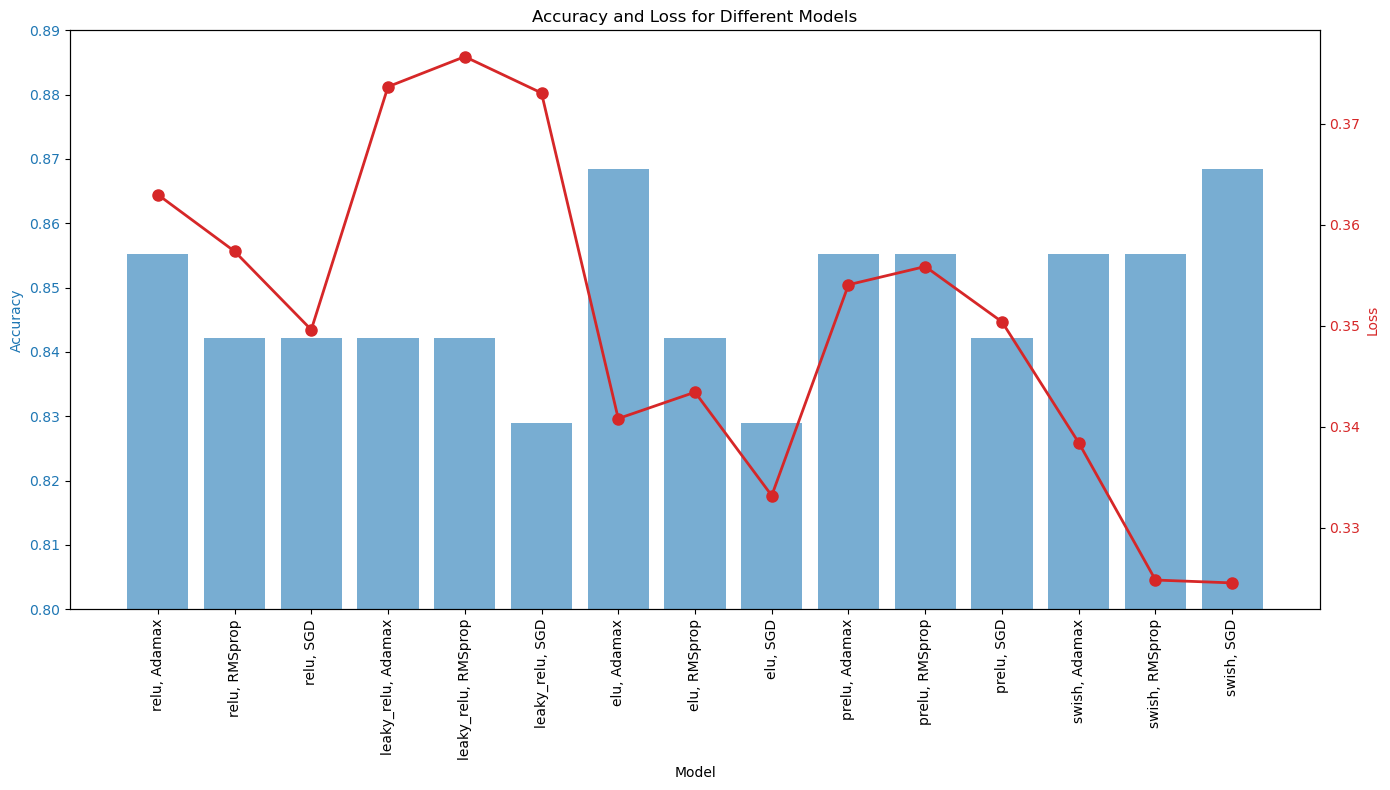

In [110]:
# Create a DataFrame
df = pd.DataFrame({
    'Model': all_labels,
    'Accuracy': all_accuracy_values,
    'Loss': all_loss_values
})

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for Accuracy
color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color=color)
ax1.bar(df['Model'], df['Accuracy'], color=color, alpha=0.6, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(df['Model'], rotation=90)
ax1.set_ylim(0.8, 0.89)  # Set the y-axis limit for Accuracy

# Create a second y-axis for Loss
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Loss', color=color)
ax2.plot(df['Model'], df['Loss'], color=color, marker='o', linestyle='-', linewidth=2, markersize=8, label='Loss')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title('Accuracy and Loss for Different Models')
fig.tight_layout()
plt.show()
